# Assignment - To see the impact of the Transformation on the shape of the dataset.

In [17]:
import seaborn as sns

In [42]:
dataframe= sns.load_dataset('iris')

In [20]:
type(dataframe)

pandas.core.frame.DataFrame

In [30]:
dataframe.describe()
# https://machinelearningmastery.com/how-to-calculate-the-5-number-summary-for-your-data-in-python/ 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
dataframe['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

EXPLORATORY DATA ANALYSIS
Petal_width and petal_length seem to have some co-relation

C:\MySW\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


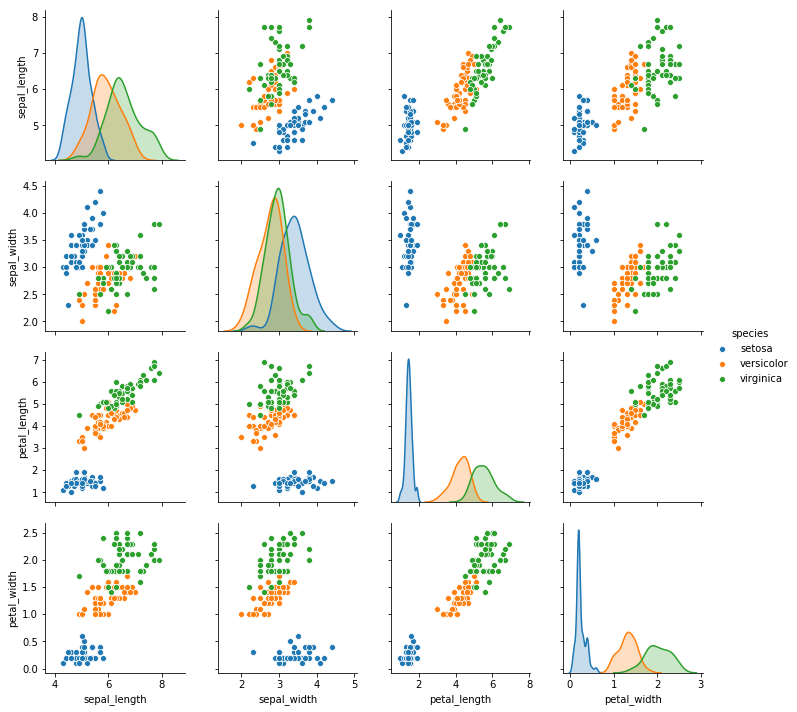

In [25]:
g = sns.pairplot(dataframe, hue="species")

Plot univariate Histogram

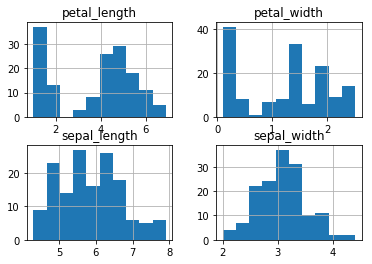

In [28]:
import matplotlib.pyplot as plt
dataframe.hist()
plt.show()

Sepal_length and Sepal_width seems to be in Normal Distribution/ 
Petal_length and Petal_width seems to be skewed

In [29]:
#Find the correlation matrix amongst the features
dataframe.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Applying MinMax scalar to see the impact
https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/

In [55]:
import pandas as pd
mm_scalar = preprocessing.MinMaxScaler()
dataframe_copy= dataframe.copy()
dataframe_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
scaled_df = mm_scalar.fit_transform(dataframe_copy.drop(['species'], axis=1)) 
scaled_df = pd.DataFrame(scaled_df,columns=dataframe.columns[0:4])
scaled_df = scaled_df.assign(species=dataframe_copy['species'])
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


In [58]:
scaled_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [59]:
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


C:\MySW\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


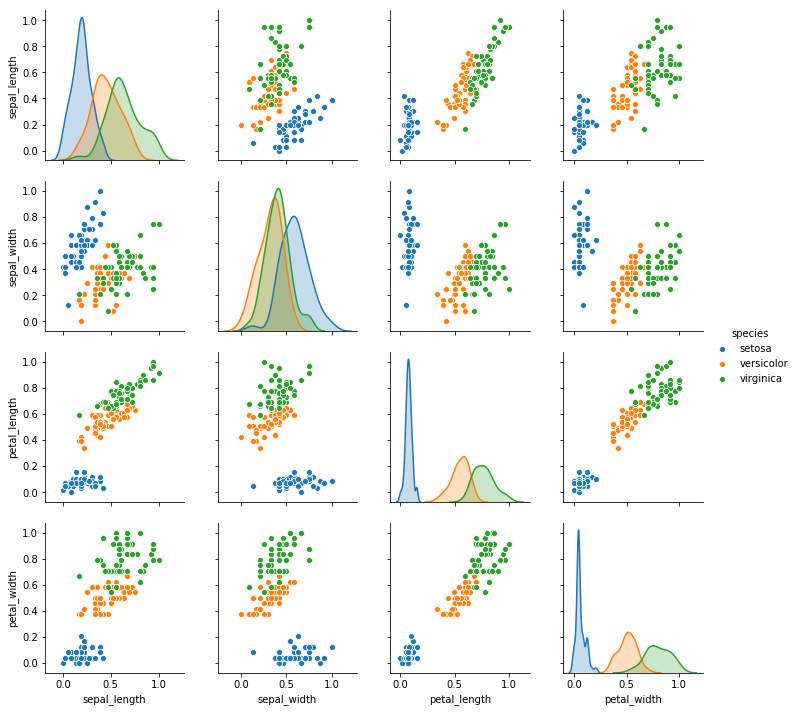

In [60]:
g3=sns.pairplot(scaled_df, hue="species")

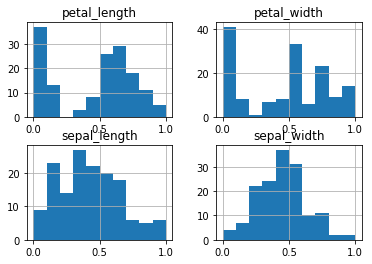

In [61]:
scaled_df.hist()
plt.show()

# Conclusion :- With MinMaxScaler, the shape of the dataset remains same